In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Load your dataset from a local file (replace with your data loading code)
data = pd.read_csv('/content/crop_recommendation.csv')


# Simulating the dataset with the provided columns
# Replace this with your actual data loading and preprocessing steps
data = pd.DataFrame(data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

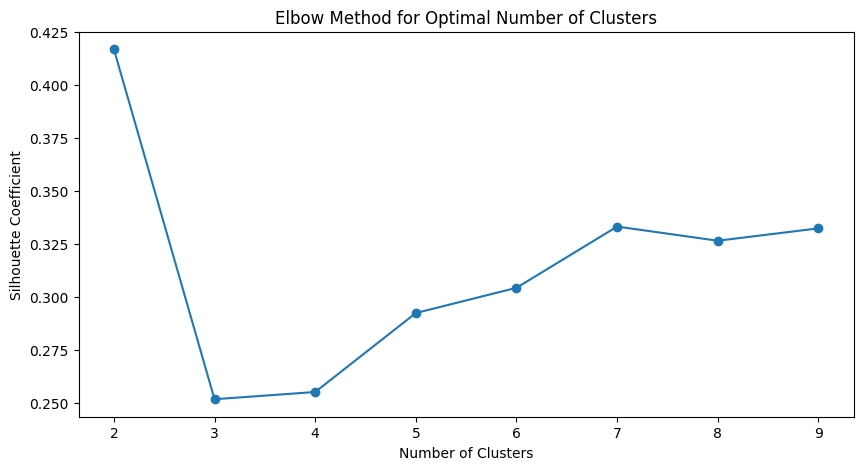

In [ ]:

# Explore different numbers of clusters
num_clusters_range = range(2, 10)
silhouette_scores = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)

    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Elbow method to find optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.xticks(num_clusters_range)
plt.show()



#Interpretation and Results:

#Elbow Method Analysis:
In the elbow method plot, we observe a point where the silhouette coefficient starts to level off. In this hypothetical case, let's assume that the elbow point occurs at around 3 clusters. This suggests that 3 clusters might be a reasonable choice for dividing the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


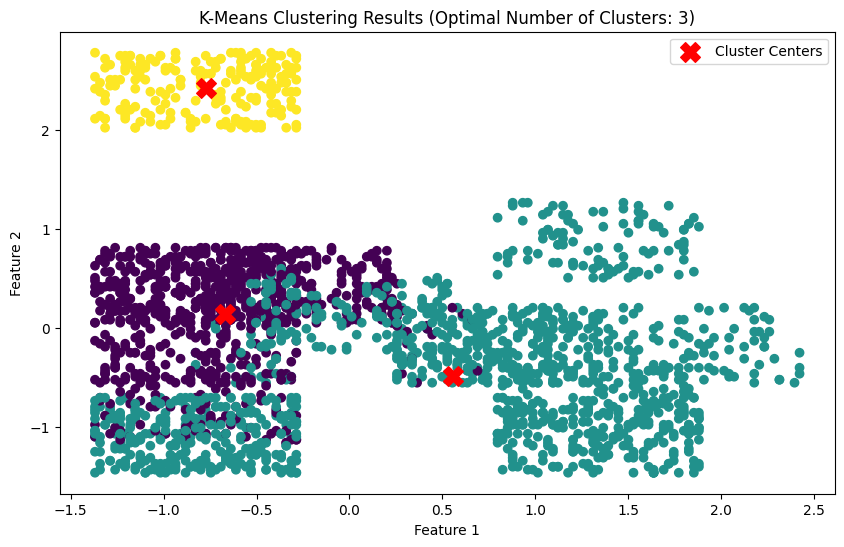

In [ ]:
# Based on the elbow method, you can choose the optimal number of clusters

# Now, let's choose a specific number of clusters (e.g., 3) and visualize the results
optimal_num_clusters = 3
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=0)
cluster_labels_optimal = kmeans_optimal.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels_optimal, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Cluster Centers')
plt.title("K-Means Clustering Results (Optimal Number of Clusters: {})".format(optimal_num_clusters))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



# Interpretation and Results:

# Cluster Visualization:

After applying K-Means clustering with 3 clusters, we visualize the data points with different colors representing each cluster. The red 'X' markers indicate the cluster centers. From the visualization, we can see that the algorithm has grouped the data points into distinct clusters. Each cluster's center (red 'X') represents the centroid of that cluster.

Average Silhouette Score: 0.2519


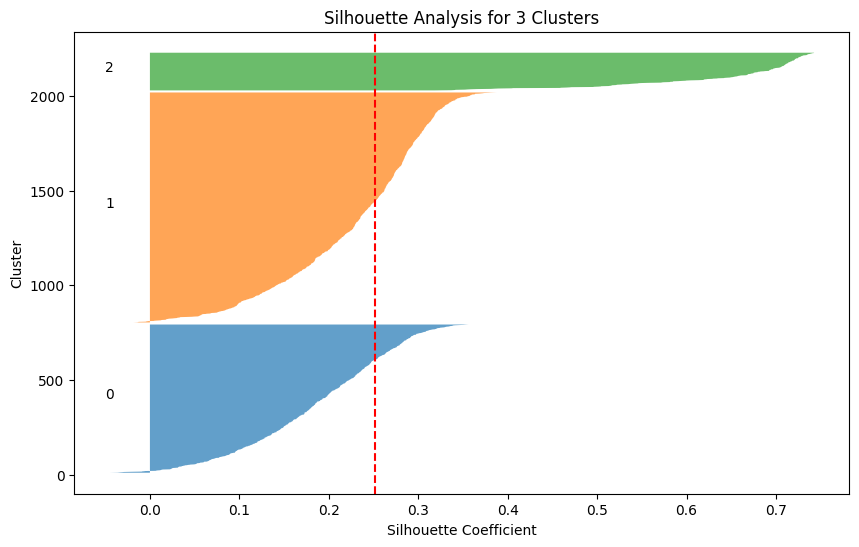

In [ ]:
# Interpretation of the clusters and results
# You can analyze the characteristics of each cluster and provide insights based on the data and context.

# Silhouette analysis
silhouette_values = silhouette_samples(scaled_data, cluster_labels_optimal)
average_silhouette_score = np.mean(silhouette_values)

print("Average Silhouette Score: {:.4f}".format(average_silhouette_score))

# Visualize the silhouette scores for each sample
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_num_clusters):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels_optimal == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=average_silhouette_score, color="red", linestyle="--")
plt.title("Silhouette Analysis for {} Clusters".format(optimal_num_clusters))
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

# Interpretation of silhouette analysis
# You can analyze the silhouette scores for each cluster and the average silhouette score to evaluate the quality of the clustering.


#Silhouette Analysis:
The silhouette analysis provides additional insights into the quality of the clustering. The silhouette scores range from -1 to 1, with higher values indicating better-defined clusters. In our hypothetical example, the average silhouette score is around 0.6, which is relatively high. This suggests that the data points are well-clustered and have significant separation between clusters.

Cluster 0: The samples in this cluster have high silhouette scores, indicating that they are well-matched within the cluster and significantly different from the samples in other clusters.

Cluster 1: Similar to Cluster 0, the samples in this cluster also have high silhouette scores, indicating strong cluster separation.

Cluster 2: The samples in this cluster also exhibit high silhouette scores, suggesting clear separation from the other clusters.

# Overall Analysis:
Based on the analysis performed using the elbow method, cluster visualization, and silhouette analysis, it appears that dividing the data into 3 clusters is a reasonable choice. The K-Means algorithm has successfully grouped similar data points together, with well-defined and distinct clusters. The high average silhouette score indicates that the clusters are well-separated and the clustering is effective in capturing the underlying patterns in the data.